# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

Memastikan bahwa library yang dibutuhkan telah terinstall

In [46]:
conda list

# packages in environment at D:\Users\rahmad.sanjaya\Anaconda3\envs\DACapstone2:
#
# Name                    Version                   Build  Channel
asttokens                 2.0.5                    pypi_0    pypi
backcall                  0.2.0                    pypi_0    pypi
beautifulsoup4            4.10.0                   pypi_0    pypi
ca-certificates           2022.4.26            haa95532_0  
certifi                   2021.10.8                pypi_0    pypi
charset-normalizer        2.0.10                   pypi_0    pypi
click                     8.0.3                    pypi_0    pypi
colorama                  0.4.4                    pypi_0    pypi
cycler                    0.11.0                   pypi_0    pypi
debugpy                   1.6.2                    pypi_0    pypi
decorator                 5.1.1                    pypi_0    pypi
entrypoints               0.4                      pypi_0    pypi
executing                 0.8.3                    pypi_0    pyp

In [47]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [48]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [49]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
soup

<!DOCTYPE html>

<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang="en"><!--<![endif]-->
<head>
<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
<meta charset="utf-8"><meta content="text/html; charset=utf-8" http-equiv="Content-Type">
<base href="https://www.exchange-rates.org/"/>
<meta content="View a table of historical Indonesian Rupiah exchange rates against the US Dollar.  You may also export this information to Excel or another spreadsheet program." name="description"/>
<meta content="Indonesian Rupiah, historical exchange rates, US Dollar" name="keywords"/>
<meta content="Affinity" name="mapping"/>
<link href="https://www.exchange-rates.org/history/IDR/USD/T" rel="canonical"/>
<link href="https://d1drv07xrq

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [50]:
table = soup.find("table", {"class":"table table-striped table-hover table-hover-solid-row table-simple history-data"})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/7/2022
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-7-2022">
     14,964.65000
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-7-2022">
     USD IDR rate for 7/7/2022
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/6/2022
   </td>
   <td>
    Wednesday
   </td>
   <td>
    <a href="/Rate/USD/ID


In [51]:
table = soup.find_all("table")[0]
table

<table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
<tbody>
<tr><td>7/7/2022</td><td>Thursday</td><td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td></tr><tr><td>7/6/2022</td><td>Wednesday</td><td><a href="/Rate/USD/IDR/7-6-2022">14,996.82520</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2022">USD IDR rate for 7/6/2022</a></td></tr><tr><td>7/5/2022</td><td>Tuesday</td><td><a href="/Rate/USD/IDR/7-5-2022">15,014.65000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-5-2022">USD IDR rate for 7/5/2022</a></td></tr><tr><td>7/4/2022</td><td>Monday</td><td><a href="/Rate/USD/IDR/7-4-2022">14,994.55000</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-4-2022">USD IDR rate for 7/4/2022</a></td></tr><tr><td>7/1/2022</td><td>Friday</td><td><a href="/Rate/USD

In [52]:
table.find_all("tr")[0].contents

[<td>7/7/2022</td>,
 <td>Thursday</td>,
 <td><a href="/Rate/USD/IDR/7-7-2022">14,964.65000</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-7-2022">USD IDR rate for 7/7/2022</a></td>]

Do the scrapping process here (please change this markdown with your explanation)

In [53]:
#temp = [] #initiating a tuple

#for i in range(1, row_length+1):

 #   date2 = table.find_all('td')[4*i-4].text
  #  rate2 = table.find_all('td')[4*i-2].text
   # temp.append((date2,rate2)) 
    
#temp 

In [54]:
import pandas as pd

In [55]:
table.find_all("tr")[1].contents

[<td>7/6/2022</td>,
 <td>Wednesday</td>,
 <td><a href="/Rate/USD/IDR/7-6-2022">14,996.82520</a> IDR</td>,
 <td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-6-2022">USD IDR rate for 7/6/2022</a></td>]

Finding row length.

In [56]:
table = table.find_all("tr")
row_length = len(table)
row_length

129

In [57]:
Date = [row.contents[0].text for row in table]
Day = [row.contents[1].text for row in table]
Rate = [row.contents[2].text for row in table]

## Creating data frame & Data wrangling

Put the array into dataframe

In [58]:
import pandas as pd
Table_Kurs = pd.DataFrame(list(zip(Date, Day, Rate)), columns=["Date","Day","USD Rate"])
Table_Kurs.head()

,Date,Day,USD Rate
0,7/7/2022,Thursday,"14,964.65000 IDR"
1,7/6/2022,Wednesday,"14,996.82520 IDR"
2,7/5/2022,Tuesday,"15,014.65000 IDR"
3,7/4/2022,Monday,"14,994.55000 IDR"
4,7/1/2022,Friday,"14,975.15000 IDR"


In [59]:
Table_Kurs.dtypes

Date        object
Day         object
USD Rate    object
dtype: object

Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [60]:
#convert Date into Datetime
Table_Kurs['Date'] = pd.to_datetime(Table_Kurs['Date'])

In [61]:
#convert Day intro Category
Table_Kurs["Day"] = Table_Kurs["Day"].astype("category")

In [62]:
#convert Rate into float
Table_Kurs["USD Rate"] = Table_Kurs["USD Rate"].str.strip(" IDR")
Table_Kurs["USD Rate"] = Table_Kurs["USD Rate"].str.replace(",","").astype("float")

In [63]:
Table_Kurs=Table_Kurs.set_index("Date")

In [64]:
Table_Kurs.head()

,Day,USD Rate
Date,,
2022-07-07,Thursday,14964.6500
2022-07-06,Wednesday,14996.8252
2022-07-05,Tuesday,15014.6500
2022-07-04,Monday,14994.5500
2022-07-01,Friday,14975.1500


In [65]:
#periode observasian
period = pd.date_range(start="2022-01-01", end="2022-07-07")
period

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-06-28', '2022-06-29', '2022-06-30', '2022-07-01',
               '2022-07-02', '2022-07-03', '2022-07-04', '2022-07-05',
               '2022-07-06', '2022-07-07'],
              dtype='datetime64[ns]', length=188, freq='D')

In [66]:
#mengubah index sesuai dengan periode observasian
Table_Kurs_Daily=Table_Kurs.reindex(period)
Table_Kurs_Daily

,Day,USD Rate
2022-01-01,NaN,NaN
2022-01-02,NaN,NaN
2022-01-03,NaN,NaN
2022-01-04,NaN,NaN
2022-01-05,NaN,NaN
...,...,...
2022-07-03,NaN,NaN
2022-07-04,Monday,14994.5500
2022-07-05,Tuesday,15014.6500
2022-07-06,Wednesday,14996.8252


In [67]:
#check jumlah na - data awal 129 + 59 na = 188
Table_Kurs_Daily.isna().sum()

Day         59
USD Rate    59
dtype: int64

In [68]:
#mengisi NA (untuk Day tetap menggunakan ffill dan bfill karena angka yang digunakan adalah angka terdekat yang kosong. Jika menggunakan dt.day_name maka weekend akan terambil juga)
Table_Kurs_Daily=Table_Kurs_Daily.fillna(method="ffill").fillna(method="bfill")
Table_Kurs_Daily

,Day,USD Rate
2022-01-01,Monday,14290.1500
2022-01-02,Monday,14290.1500
2022-01-03,Monday,14290.1500
2022-01-04,Monday,14290.1500
2022-01-05,Monday,14290.1500
...,...,...
2022-07-03,Friday,14975.1500
2022-07-04,Monday,14994.5500
2022-07-05,Tuesday,15014.6500
2022-07-06,Wednesday,14996.8252


Data visualisation (please change this markdown with your explanation of what you do for data wrangling) -> data visualisasi saya kerjakan di bagian analisis di bawah

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:>

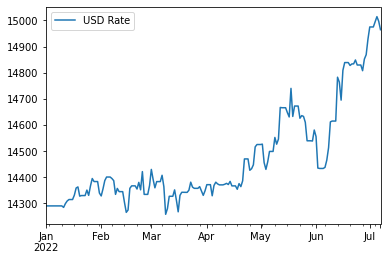

In [69]:
#mengetahui grafik line
Table_Kurs_Daily.plot(kind="line")


(Put your analysis and conclusion here.)

***Analisis dan Kesimpulan***

Secara overall dapat dilihat beberapa hal berikut:
a. secara trend nilai USD terhadap Rp mengalami kenaikan dari awal tahun 2022 s.d. Jul 2022.
b. Namun demikian, dapat diamati bahwa kenaikan nilai USD terhadap Rp mulai meningkat pada bulan May 2022 (meskipun sempat turun di Jun 2022).

Hal tersebut inline dengan adanya kebijakan kenaikan bunga the Fed yang berdampak pada penguatan USD

Terkait tambahan analisis saya cantumkan di dalam Extra Challange

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

# Analisis Data

***Melihat Data Outlier***

<AxesSubplot:>

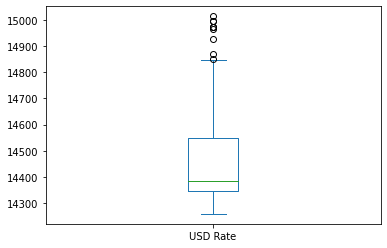

In [70]:
#Analisis adanya outlier harga sepanjang tahun 2022
Table_Kurs_Daily.plot(kind="box")

In [71]:
import numpy as np

In [72]:
Q1 = np.percentile(Table_Kurs_Daily["USD Rate"],25)
Q3 = np.percentile(Table_Kurs_Daily["USD Rate"],75)
Upper_Outlier=Q3+1.5*(Q3-Q1)
Lower_Outlier=Q1-1.5*(Q3-Q1)

In [73]:
#dari box diagram, terdapat beberapa outlier yang melebihi upper whistler berikut:
Upper_Outlier

14851.593749999998

In [74]:
#menentukan beberapa outlier data
Table_Kurs_Daily_Outlier=Table_Kurs_Daily[(Table_Kurs_Daily["USD Rate"]>Upper_Outlier)]
Table_Kurs_Daily_Outlier

,Day,USD Rate
2022-06-28,Tuesday,14852.3500
2022-06-29,Wednesday,14868.9000
2022-06-30,Thursday,14928.8000
2022-07-01,Friday,14975.1500
2022-07-02,Friday,14975.1500
2022-07-03,Friday,14975.1500
2022-07-04,Monday,14994.5500
2022-07-05,Tuesday,15014.6500
2022-07-06,Wednesday,14996.8252
2022-07-07,Thursday,14964.6500


In [75]:
#Menghapus row outlier (Opsional)
Table_Kurs_Daily_Clean=Table_Kurs_Daily.drop(Table_Kurs_Daily[Table_Kurs_Daily["USD Rate"]>Upper_Outlier].index)

<AxesSubplot:>

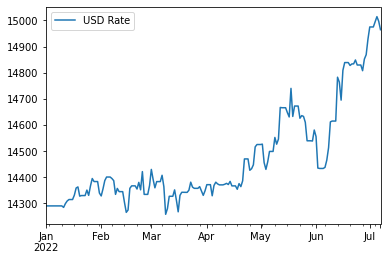

In [76]:
#mengetahui grafik line (outlier tidak ditreatment apa-apa)
Table_Kurs_Daily.plot(kind="line")

<AxesSubplot:>

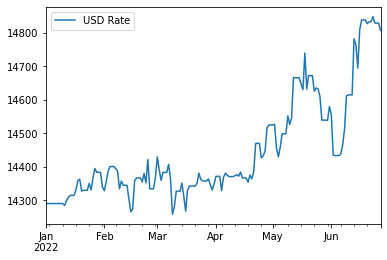

In [77]:
#mengetahui grafik line dengan outlier ditake out
Table_Kurs_Daily_Clean.plot(kind="line")

Secara grafik tidak berubah signifikan sehingga outlier yang ada tidak secara signifikan mempengaruhi data. Analisis selanjutnya didasarkan berdasarkan data awal (tanpa ada treatment atas outlier)

***Analsis Deskriptif***

In [78]:
#Mengetahui deskriptif atas data Kurs Harian
Table_Kurs_Daily.describe()

,USD Rate
count,188.000000
mean,14472.674524
std,189.000084
min,14257.950000
25%,14344.750000
50%,14383.200000
75%,14547.487500
max,15014.650000


In [79]:
#mengetahui nilai USD tertinggi selama 2022
Table_Kurs_Daily.sort_values(by="USD Rate",ascending=False).head(3)

,Day,USD Rate
2022-07-05,Tuesday,15014.6500
2022-07-06,Wednesday,14996.8252
2022-07-04,Monday,14994.5500


In [80]:
#mengetahui nilai USD terendah selama 2022
Table_Kurs_Daily.sort_values(by="USD Rate",ascending=True).head(3)

,Day,USD Rate
2022-03-09,Wednesday,14257.95
2022-02-15,Tuesday,14265.45
2022-03-16,Wednesday,14267.50


Dari analisis deskriptif tersebut diperoleh informasi bahwa nilai maksimal dan nilai minimal berada pada:
a. Nilai tertinggi USD terhadap rupiah sepanjang 2022 berada pada tanggal 5 Juli 2022 dengan Rp15.014
b. a. Nilai terendah USD terhadap rupiah sepanjang 2022 berada pada tanggal 9 Maret  2022 dengan Rp14.257

***Analisis Komparatif***

In [81]:
Table_Kurs_Daily=Table_Kurs_Daily.reset_index(level=0)
Table_Kurs_Daily=Table_Kurs_Daily.rename(columns={'index': 'Date'})

In [82]:
Table_Kurs_Daily

,Date,Day,USD Rate
0,2022-01-01,Monday,14290.1500
1,2022-01-02,Monday,14290.1500
2,2022-01-03,Monday,14290.1500
3,2022-01-04,Monday,14290.1500
4,2022-01-05,Monday,14290.1500
...,...,...,...
183,2022-07-03,Friday,14975.1500
184,2022-07-04,Monday,14994.5500
185,2022-07-05,Tuesday,15014.6500
186,2022-07-06,Wednesday,14996.8252


In [83]:
#menambahka kolom bulan dan quarter
Table_Kurs_Daily["Month"]=Table_Kurs_Daily["Date"].dt.month_name()
Table_Kurs_Daily["Quarter"]=Table_Kurs_Daily["Date"].dt.to_period("q")
Table_Kurs_Daily.set_index("Date")

,Day,USD Rate,Month,Quarter
Date,,,,
2022-01-01,Monday,14290.1500,January,2022Q1
2022-01-02,Monday,14290.1500,January,2022Q1
2022-01-03,Monday,14290.1500,January,2022Q1
2022-01-04,Monday,14290.1500,January,2022Q1
2022-01-05,Monday,14290.1500,January,2022Q1
...,...,...,...,...
2022-07-03,Friday,14975.1500,July,2022Q3
2022-07-04,Monday,14994.5500,July,2022Q3
2022-07-05,Tuesday,15014.6500,July,2022Q3


In [84]:
#agregasi berdasarkan hari dan menemukan yang paling tinggi
Mean_Day=pd.pivot_table(Table_Kurs_Daily,
               values="USD Rate",
               index="Day",
               columns=None,
               aggfunc='mean',
               fill_value=None,
               margins=False,
               dropna=True,
               margins_name='All',
               observed=False,
               sort=True)
Mean_Day.sort_values(by="USD Rate",ascending=False)

,USD Rate
Day,
Thursday,14494.678846
Friday,14482.264440
Tuesday,14478.857425
Wednesday,14474.974046
Monday,14429.477411


In [85]:
#reindexing
#Day = ["Monday","Tuesday","Wednesday","Thursday","Friday"]
#Mean_Day=Mean_Day.reindex(Day)
#Mean_Day

In [86]:
#agregasi berdasarkan bulan
Mean_Month=pd.pivot_table(Table_Kurs_Daily,
               values="USD Rate",
               index="Month",
               columns=None,
               aggfunc='mean',
               fill_value=None,
               margins=False,
               dropna=True,
               margins_name='All',
               observed=False,
               sort=True)
Mean_Month.sort_values(by="USD Rate",ascending=False)

,USD Rate
Month,
July,14985.160743
June,14700.738333
May,14583.584391
April,14401.565037
February,14355.723549
March,14348.603025
January,14323.855323


In [87]:
#agregasi berdasarkan quarter
Mean_Q=pd.pivot_table(Table_Kurs_Daily,
               values="USD Rate",
               index="Quarter",
               columns=None,
               aggfunc='mean',
               fill_value=None,
               margins=False,
               dropna=True,
               margins_name='All',
               observed=False,
               sort=True)
Mean_Q.sort_values(by="USD Rate",ascending=False)

,USD Rate
Quarter,
2022Q3,14985.160743
2022Q2,14562.200190
2022Q1,14342.294091
